In [15]:
### Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd


from sklearn.linear_model import LinearRegression
#import DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Randomly splitting the original dataset into training set and testing set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def mergeData(df):
    features =pd.read_csv('../../data/features.csv')
    storesdata =pd.read_csv('../../data/stores.csv')
    df = pd.merge(df, features, on=['Store','Date','IsHoliday'],how='inner')
    df = pd.merge(df, storesdata, on=['Store'], how='inner')
    return df

In [17]:
merged_df = mergeData(pd.read_csv('../../data/train.csv'))

In [70]:
#merged_df.fillna(value=0, inplace=True)
#merged_df.dropna(inplace=True)

In [18]:
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [19]:
%matplotlib inline

In [20]:
def scatterplots(dataset,label):
    plt.figure()
    y = merged_df['Weekly_Sales']
    plt.scatter(dataset[label],y)
    plt.ylabel('Weekly_Sales')
    plt.xlabel(label)
    

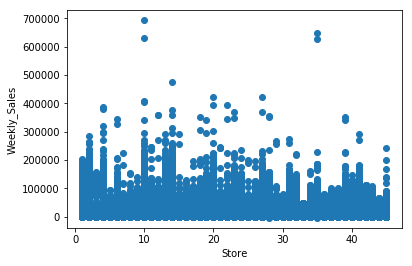

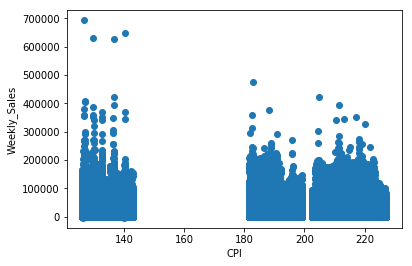

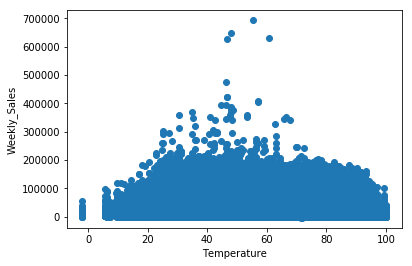

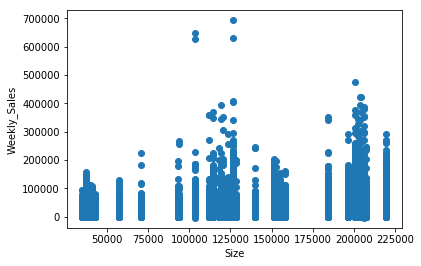

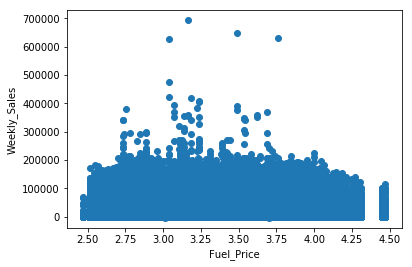

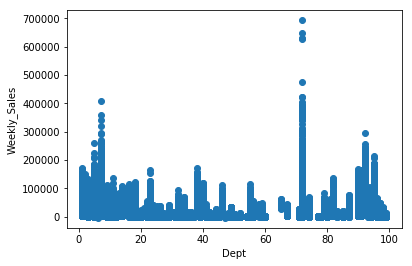

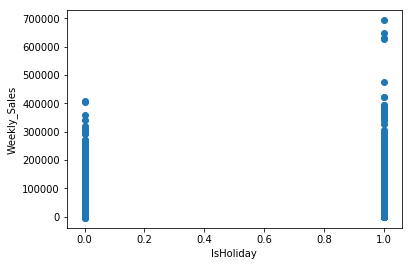

In [21]:
scatterplots(merged_df, 'Store')
scatterplots(merged_df, 'CPI')
scatterplots(merged_df, 'Temperature')
scatterplots(merged_df, 'Size')
scatterplots(merged_df, 'Fuel_Price')
scatterplots(merged_df, 'Dept')
scatterplots(merged_df, 'IsHoliday')

In [22]:
#See what our data actually looks like with the describe function. 
merged_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [23]:
merged_df.loc[merged_df['Weekly_Sales'] >350000,"Date"].value_counts()

2010-11-26    11
2011-11-25     9
2010-12-24     3
Name: Date, dtype: int64

In [24]:
merged_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [25]:
merged_df.fillna(value=0, inplace=True)
#merged_df.dropna(inplace=True)

In [26]:
merged_df['Markdowns'] = merged_df['MarkDown1'] + merged_df['MarkDown2'] + merged_df['MarkDown3'] + merged_df['MarkDown4'] + merged_df['MarkDown5'] 
labelsToDrop = ['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4','MarkDown5']
merged_df.drop(labels=labelsToDrop,axis=1, inplace=True)

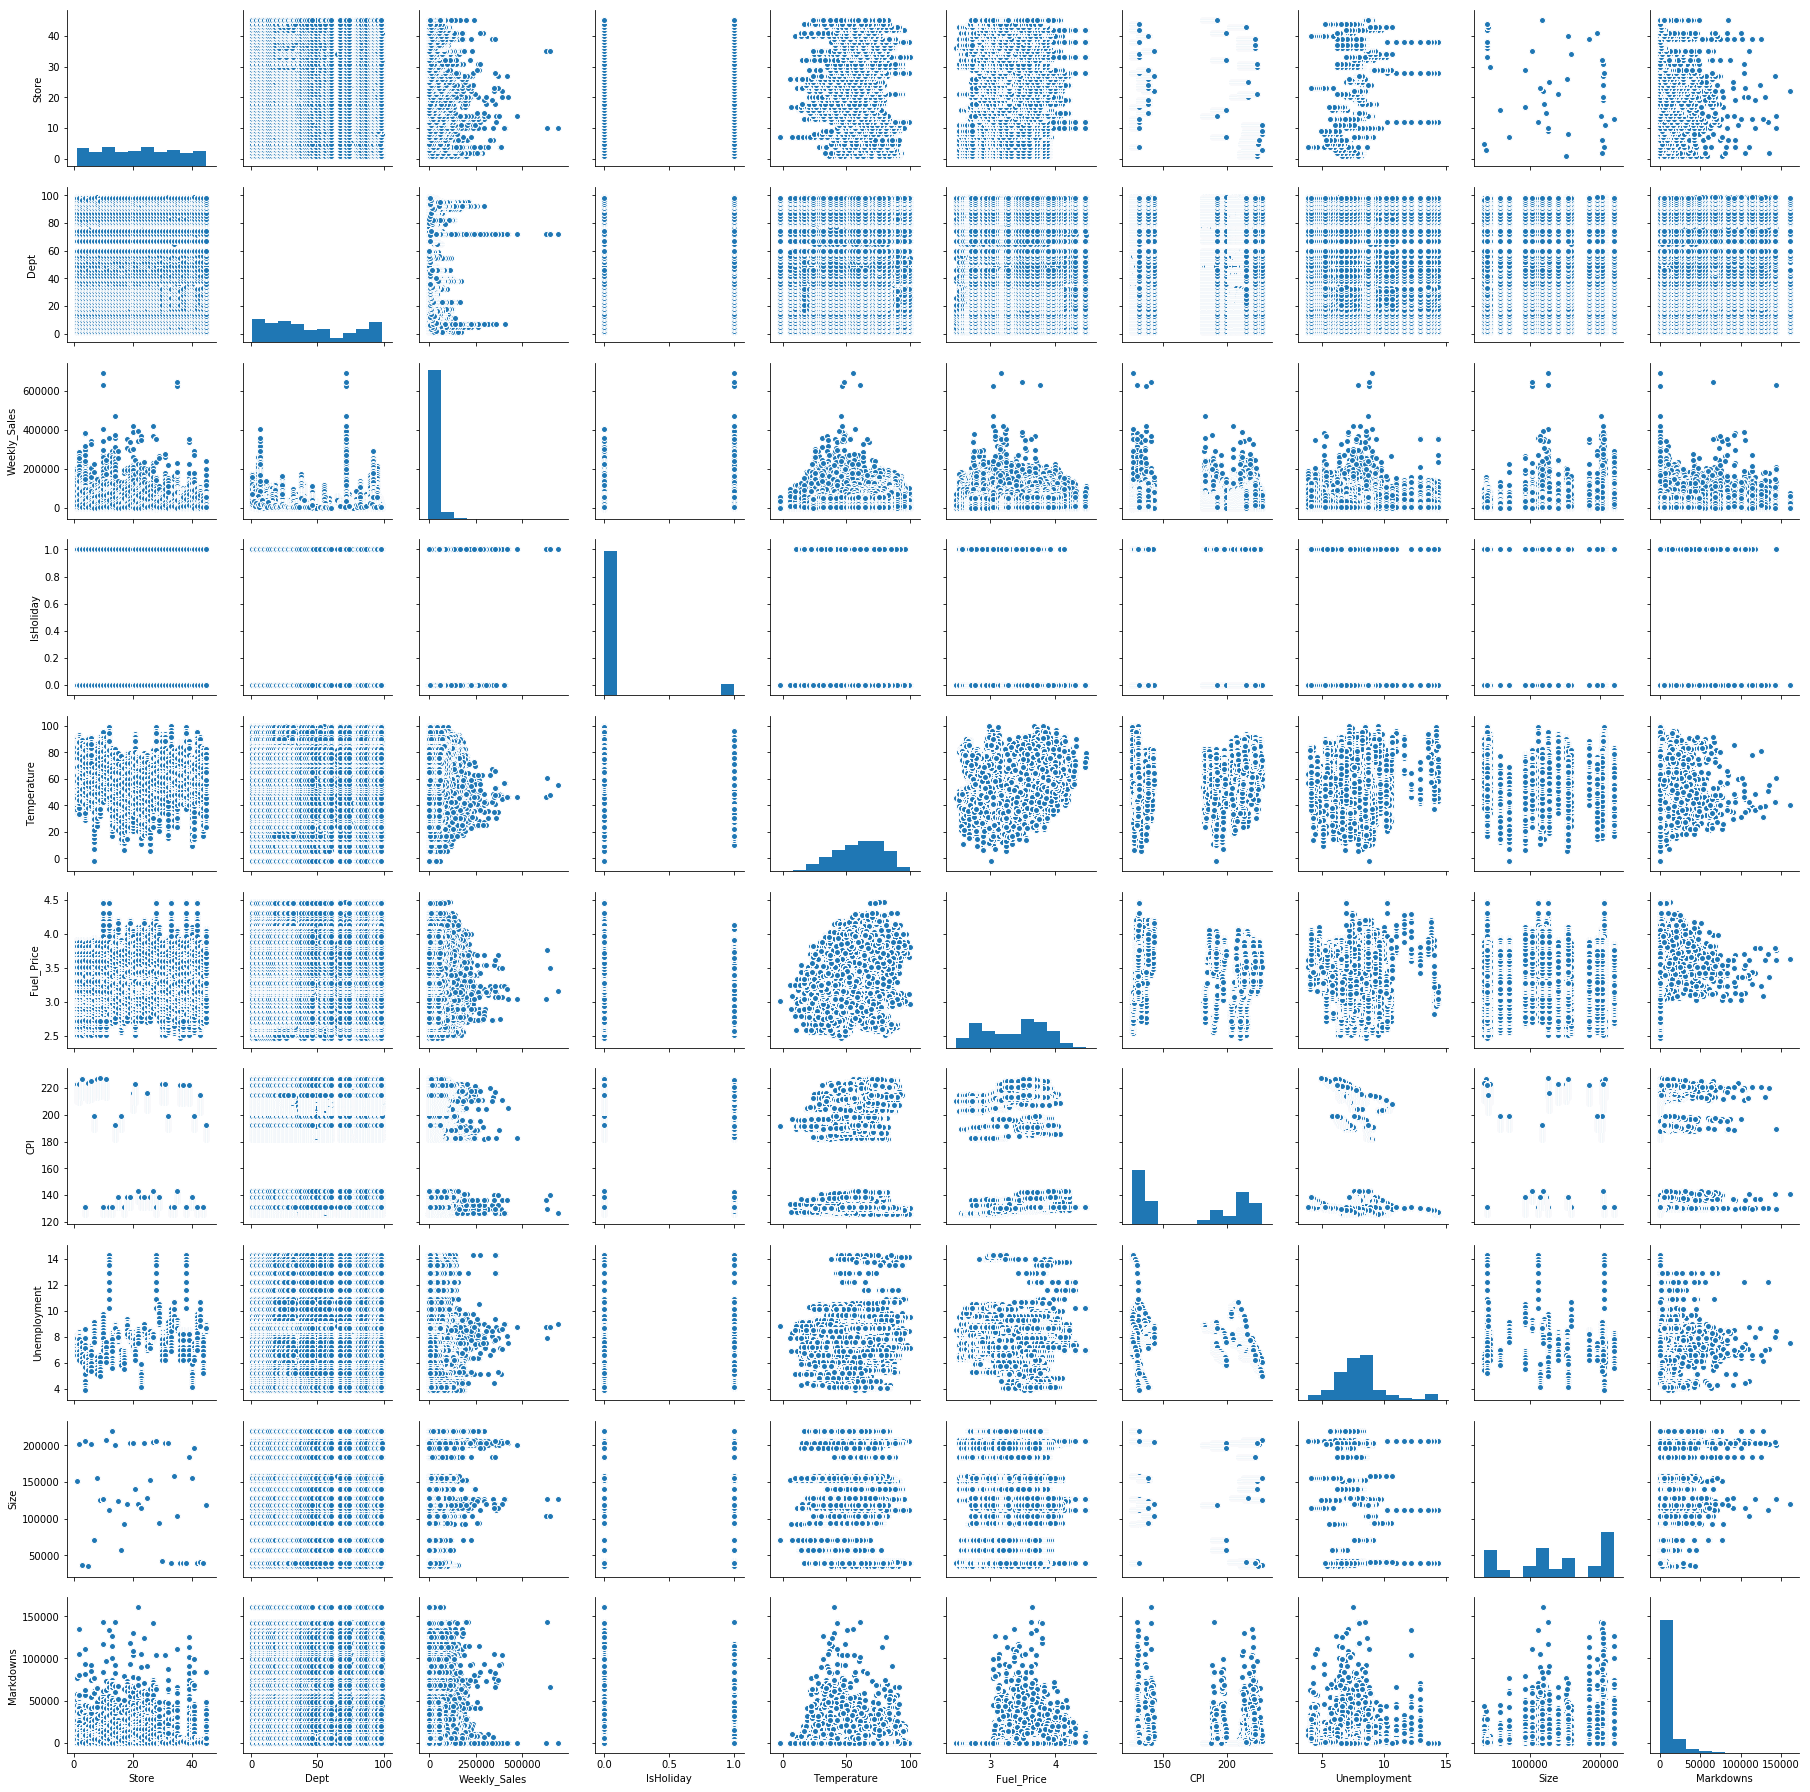

In [27]:
sns.pairplot(merged_df)

In [28]:
print(merged_df.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     2  2010-02-05      50605.27      False        42.31       2.572   
2      1     3  2010-02-05      13740.12      False        42.31       2.572   
3      1     4  2010-02-05      39954.04      False        42.31       2.572   
4      1     5  2010-02-05      32229.38      False        42.31       2.572   

          CPI  Unemployment Type    Size  Markdowns  
0  211.096358         8.106    A  151315        0.0  
1  211.096358         8.106    A  151315        0.0  
2  211.096358         8.106    A  151315        0.0  
3  211.096358         8.106    A  151315        0.0  
4  211.096358         8.106    A  151315        0.0  


In [29]:
from pandas import DatetimeIndex
df = merged_df
df.Date = pd.to_datetime(df.Date)
print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

          CPI  Unemployment Type    Size  Markdowns  
0  211.096358         8.106    A  151315        0.0  
1  211.096358         8.106    A  151315        0.0  
2  211.096358         8.106    A  151315        0.0  
3  211.096358         8.106    A  151315        0.0  
4  211.096358         8.106    A  151315        0.0  


In [30]:
df['Year'] = DatetimeIndex(df['Date']).year
df['Month']= DatetimeIndex(df['Date']).month
df['Day'] = DatetimeIndex(df['Date']).day
df = df.drop(columns=['Date'])
df[0::1000]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Markdowns,Year,Month,Day
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,0.00,2010,2,5
1000,1,81,31614.83,False,72.55,2.835,210.339968,7.808,A,151315,0.00,2010,5,7
2000,1,95,131288.83,False,87.00,2.692,211.639421,7.787,A,151315,0.00,2010,8,13
3000,1,81,29383.02,False,51.41,2.771,211.889674,7.838,A,151315,0.00,2010,11,19
4000,1,79,30624.72,False,62.90,3.065,213.535609,7.742,A,151315,0.00,2011,2,25
5000,1,72,34638.69,False,83.00,3.699,215.273655,7.682,A,151315,0.00,2011,6,3
6000,1,85,2681.87,True,76.00,3.546,215.861056,7.962,A,151315,0.00,2011,9,9
7000,1,60,1443.20,False,51.63,3.159,219.179453,7.866,A,151315,9662.85,2011,12,16
8000,1,44,4356.74,False,65.93,3.787,221.286413,7.348,A,151315,10216.95,2012,3,23
9000,1,56,2159.46,False,84.88,3.286,221.843400,7.143,A,151315,8776.29,2012,6,29


In [31]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Markdowns,Year,Month,Day
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739,6684.041435,2010.968591,6.449510,15.673131
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328,14750.941552,0.796876,3.243217,8.753549
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000,0.000000,2010.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000,0.000000,2010.000000,4.000000,8.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000,0.000000,2011.000000,6.000000,16.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000,8075.260000,2012.000000,9.000000,23.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000,160510.610000,2012.000000,12.000000,31.000000


In [41]:
print(merged_df.loc[merged_df['Weekly_Sales'] >350000,"Month"].value_counts())

11    20
12     3
Name: Month, dtype: int64


# Testing and Training Data

In [155]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Markdowns',
       'Year', 'Month', 'Day'],
      dtype='object')

In [156]:
y = df['Weekly_Sales']

In [157]:
X = df[['Store', 'Dept','IsHoliday', 'Temperature','Fuel_Price', 'CPI', 'Unemployment', 'Size', 'Markdowns']]

In [35]:
#here we need this library to scale X
#from sklearn import preprocessing

#normalizing feature comlumns 
#X = preprocessing.scale(X)

In [158]:
#Randomly Splitting the original dataset into training set and testing set. 30% of data samples for testing, and rest 70% for training.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [159]:
lr = LinearRegression()

In [160]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Print out Coefficients of the model

In [161]:
lr.coef_

array([-1.50690825e+02,  1.09894611e+02,  4.21903825e+02,  8.93527455e+00,
       -1.56639884e+03, -3.29979901e+01, -4.78313416e+02,  1.00380466e-01,
        3.11132093e-02])

In [162]:
predictions = lr.predict(X_test)

Text(0,0.5,'Predicted Values')

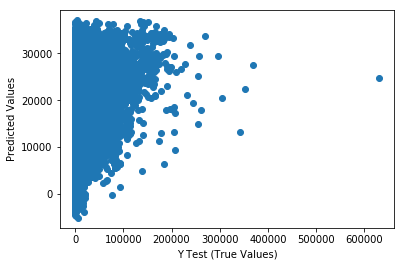

In [163]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

# Evaulating the Model 

Calculating Mean Absolute Error, Mean Sqaure Error, And Root Mean Sqaure Error.

In [164]:
from sklearn import metrics

In [165]:
print('MAE ', metrics.mean_absolute_error(y_test,predictions))
print('MSE ', metrics.mean_squared_error(y_test,predictions))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE  16180.91780103272
MSE  584716080.8086878
RMSE  24180.90322565904


# RECREATE THE DATAFRAME 

In [90]:
cdf = pd.DataFrame(lr.coef_, columns=['Coeff'])

In [91]:
cdf

,Coeff
0,-150.690825
1,109.894611
2,421.903825
3,8.935275
4,-1566.398844
5,-32.997990
6,-478.313416
7,0.100380
8,0.031113
